# bZm analysis ((all))

Import relevent libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

Load the data

In [4]:
data = pd.read_csv('Monthly KPI - TeamRawData.csv')
data

,month_date,sawskillname,worker name,img_count,total_mastery_ipt_hours,total_mastery_opt_hours,rej_count,efficiency_score,Rej_rate
0,2020-1,Complex Mask,Akram Hossan,373,42.546554,61.101111,37.0,0.696330,0.10
1,2020-1,Complex Mask,Asaduzzaman,333,45.583973,50.275278,55.0,0.906688,0.17
2,2020-1,Complex Mask,Bipul Prominike,702,81.719577,112.421111,104.0,0.726906,0.15
3,2020-1,Complex Mask,Faijul Islam,586,99.988914,88.313056,51.0,1.132210,0.09
4,2020-1,Complex Mask,Ibrahim Ranto,784,87.130113,122.972500,102.0,0.708533,0.13
...,...,...,...,...,...,...,...,...,...
2780,2020-12,New Advanced Path,Towfikul islam,178,7.000000,8.900000,5.0,0.788310,0.03
2781,2020-12,New Path & Mask,Towfikul islam,28,0.200000,1.300000,1.0,0.147730,0.04
2782,2020-12,New Layer Mask,Yeamin,994,26.400000,36.200000,46.0,0.727920,0.05
2783,2020-12,Complex Mask,Yeamin,179,16.200000,29.800000,15.0,0.543750,0.08


# For complex mask

(0.0, 0.3)

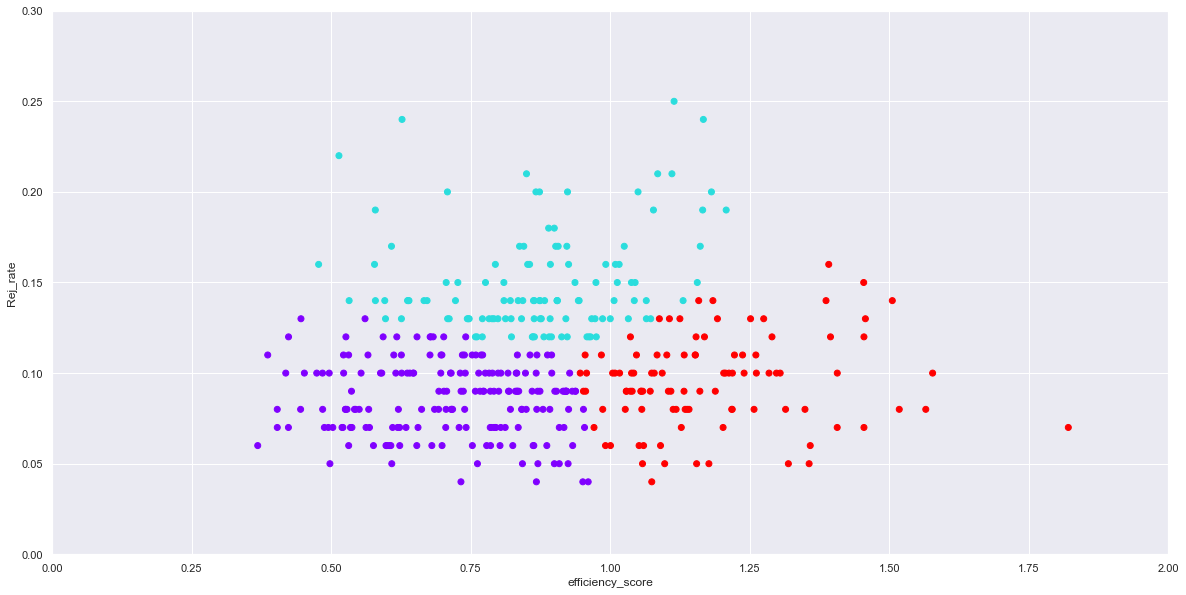

In [15]:
filt = (data['sawskillname'] == 'Complex Mask' )
data[filt]
skill = data[filt]
skill

filt = (skill['month_date'] != '2020-06' )
skills = skill[filt]
skills

adj_skill = skills[['efficiency_score','Rej_rate']]
adj_skill

#for checking purpose
kmeans = KMeans(2) 
kmeans.fit(x)

## Select the features
x = adj_skill.copy()
clusters = x.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)
# plt.scatter(clusters['efficiency_score'],clusters['Rej_rate'],c =clusters['clusters_pred'],cmap='rainbow')
# plt.ylabel('Rej_rate')
# plt.xlabel('efficiency_score')
# plt.xlim(0,2)
# plt.ylim(0,0.3)

## Standerdize the variable
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

wcss= []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

# Elbow Method
# plt.plot(range(1,10),wcss)
# plt.xlabel('Number of Clusters')
# plt.ylabel('wcss')

## Explore clustering solutions and select the number of clusters
kmeans_new = KMeans(4) # number 4 and 5 are the new clusters which shows better reperesentation
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

plt.figure(figsize=(20,10))
plt.scatter(cluster_new['efficiency_score'],cluster_new['Rej_rate'],c =cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('efficiency_score')
plt.ylabel('Rej_rate')
plt.xlim(0,2)
plt.ylim(0,0.3)

# Comments- 
          1. Violet - Good
          2. Red - Bad based on Eff
          3. Blue -Bad based on Rej

# For New Advance Path

(0.0, 0.3)

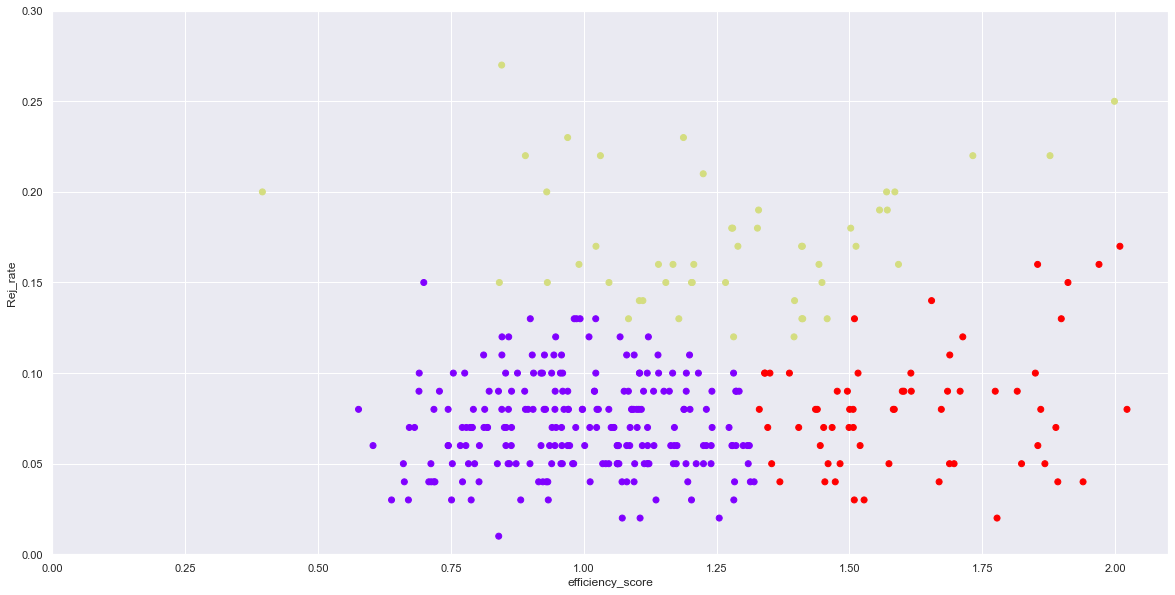

In [16]:
filt = (data['sawskillname'] == 'New Advanced Path' )
data[filt]
skill = data[filt]
skill

filt = (skill['month_date'] != '2020-06' )
skills = skill[filt]
skills

adj_skill = skills[['efficiency_score','Rej_rate']]
adj_skill

# Select the features
x = adj_skill.copy()
clusters = x.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)
# plt.scatter(clusters['efficiency_score'],clusters['Rej_rate'],c =clusters['clusters_pred'],cmap='rainbow')
# plt.ylabel('Rej_rate')
# plt.xlabel('efficiency_score')
# plt.xlim(0,2.1)
# plt.ylim(0,0.3)

# Standerdize the variable
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

wcss= []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

#Elbow Method
# plt.plot(range(1,10),wcss)
# plt.xlabel('Number of Clusters')
# plt.ylabel('wcss')

# Explore clustering solutions and select the number of clusters
kmeans_new = KMeans(4) # number 4 and 5 are the new clusters which shows better reperesentation
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new


plt.figure(figsize=(20,10))
plt.scatter(cluster_new['efficiency_score'],cluster_new['Rej_rate'],c =cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('efficiency_score')
plt.ylabel('Rej_rate')
plt.xlim(0,2.1)
plt.ylim(0,0.3)

# Comments- 
          1. Violet - Good
          2. Red - Bad based on Eff
          3. Yellow -Bad based on Rej

# For New Layer Mask

(0.0, 0.2)

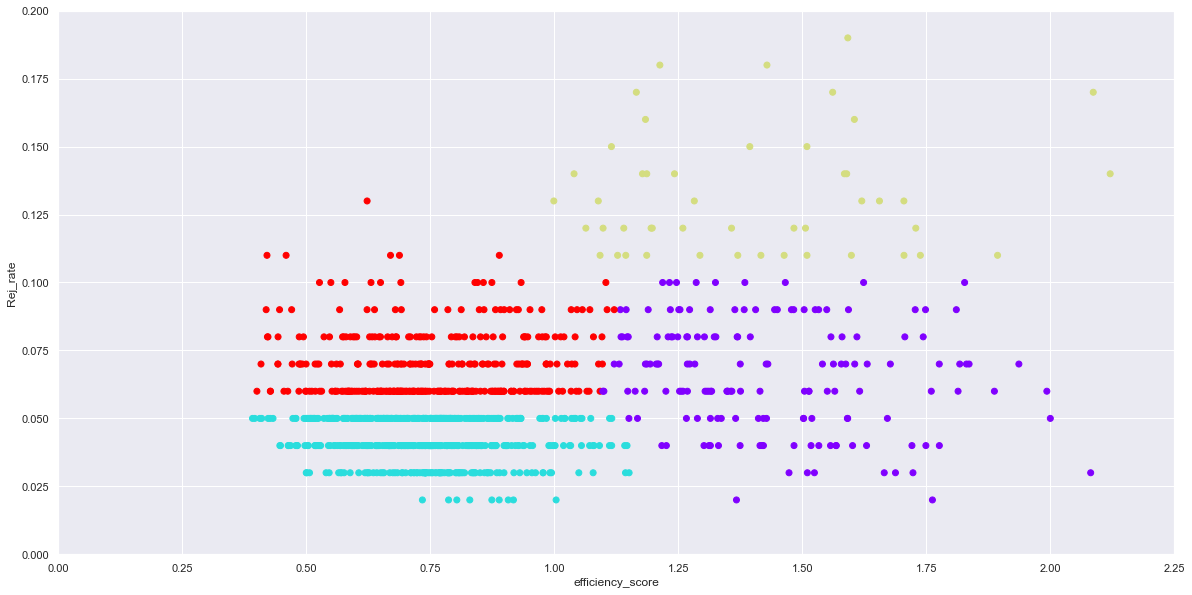

In [19]:
filt = (data['sawskillname'] == 'New Layer Mask' )
data[filt]
skill = data[filt]
skill

filt = (skill['month_date'] != '2020-06' )
skills = skill[filt]
skills

adj_skill = skills[['efficiency_score','Rej_rate']]
adj_skill

## Select the features
x = adj_skill.copy()
clusters = x.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)
# plt.scatter(clusters['efficiency_score'],clusters['Rej_rate'],c =clusters['clusters_pred'],cmap='rainbow')
# plt.ylabel('Rej_rate')
# plt.xlabel('efficiency_score')
# plt.xlim(0,2.25)
# plt.ylim(0,0.2)

## Standerdize the variable
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

wcss= []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

# # Elbow Method
# # plt.plot(range(1,10),wcss)
# # plt.xlabel('Number of Clusters')
# # plt.ylabel('wcss')

## Explore clustering solutions and select the number of clusters
kmeans_new = KMeans(4) # number 4 and 5 are the new clusters which shows better reperesentation
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new


plt.figure(figsize=(20,10))
plt.scatter(cluster_new['efficiency_score'],cluster_new['Rej_rate'],c =cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('efficiency_score')
plt.ylabel('Rej_rate')
plt.xlim(0,2.25)
plt.ylim(0,0.2)

# Comments- 
          1. Blue - Good
          2. Yellow - Bad based on Eff & Rej
          3. Violet - Bad based on Eff
          4. Red - Bad based on Rej